<table>
  <tr>
    <td> <center><img src="images/header.png" width=400></center> </td>
    <td> <center><img src="images/header2.png" width=400></center> </td>
  </tr>
</table>

<h1><center>Основы машинного обучения</center></h1>
<hr>
<h2><center>Анализ графов и социальных сетей</center></h2>
<h3><center>Шестаков Андрей</center></h3>

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')

In [3]:
import networkx as nx

In [4]:
# Uncomment if you are using colab
# !mkdir ./data
# !mkdir ./data/1504653

# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/chapters.csv -O ./data/chapters.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/characters.csv -O ./data/characters.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/events.csv -O ./data/events.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/teams.csv -O ./data/teams.csv
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/nested_partition.gml -O ./data/nested_partition.gml
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/Princeton.gml -O ./data/Princeton.gml
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/network.gml -O ./data/network.gml
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/1504653/friends_1504653.json -O ./data/1504653/friends_1504653.json
# !wget https://raw.githubusercontent.com/vadim0912/MLbase_2021_spring/l4/lecture04/data/1504653/common_friends_1504653.json -O ./data/1504653/common_friends_1504653.json

# Создадим граф в [networkX](https://networkx.github.io/documentation/stable/)

In [5]:
g = nx.Graph()

In [6]:
g

In [7]:
# Как корабль назовешь..
g.graph['some title'] = 'first graph'

In [8]:
g.graph

{'some title': 'first graph'}

## Добавим вершины

In [9]:
g.add_node(1)

In [12]:
g.number_of_nodes()

2

In [11]:
g.add_node('some_node') # можно создавать вершины с произвольным идентификатором

## Добавим ребра

In [13]:
g.add_edge(0, 1) # если вершины с идентификатором х еще не было, то она автоматически сгенерируется

In [14]:
g.edges()

EdgeView([(1, 0)])

In [15]:
g.nodes()

NodeView((1, 'some_node', 0))

In [16]:
g.add_edges_from([(0,2), 
                  (1,3), 
                  (4,3), 
                  (1,2), 
                  (2,2), 
                  (3,2)])

In [17]:
g.edges()

EdgeView([(1, 0), (1, 3), (1, 2), (0, 2), (2, 2), (2, 3), (3, 4)])

## Различные операции с вершинами и ребрами

In [18]:
g.degree() # Степени вершин (количество связей для каждой вершины)

DegreeView({1: 3, 'some_node': 0, 0: 2, 2: 5, 3: 3, 4: 1})

In [19]:
g.degree['some_node']

0

Вершинам можно задавать различные атрибуты (читай "признаки")

In [21]:
for n_id in g.nodes():
    g.nodes[n_id]['label'] = 'v_{}'.format(n_id)

In [22]:
nx.get_node_attributes(g, 'label')

{1: 'v_1', 'some_node': 'v_some_node', 0: 'v_0', 2: 'v_2', 3: 'v_3', 4: 'v_4'}

In [23]:
g.nodes[1]

{'label': 'v_1'}

In [24]:
g.nodes.data()

NodeDataView({1: {'label': 'v_1'}, 'some_node': {'label': 'v_some_node'}, 0: {'label': 'v_0'}, 2: {'label': 'v_2'}, 3: {'label': 'v_3'}, 4: {'label': 'v_4'}})

Иногда это удобнее делать так:

In [25]:
some_attributes = {0: 'val1', 1: 'val2'}
nx.set_node_attributes(g, some_attributes, 'attr')

In [26]:
g.nodes.data()

NodeDataView({1: {'label': 'v_1', 'attr': 'val2'}, 'some_node': {'label': 'v_some_node'}, 0: {'label': 'v_0', 'attr': 'val1'}, 2: {'label': 'v_2'}, 3: {'label': 'v_3'}, 4: {'label': 'v_4'}})

Тоже самое для ребер

In [27]:
g.edges[1,0]['type'] = 'friendship'

In [28]:
g.edges[1,0]

{'type': 'friendship'}

In [29]:
# проверка различных свойств графа
g.is_directed() 

False

In [30]:
nx.is_connected(g)

False

## Объединение графов

In [31]:
g1 = g.copy()
g2 = nx.erdos_renyi_graph(10, 0.3)

In [36]:
# g3 = nx.disjoint_union(g1, g2)
g3 = nx.union(g1, g2, rename=('g1_', 'g2_'))

In [37]:
print(g1.number_of_nodes())
print(g2.number_of_nodes())
print(g3.number_of_nodes())

6
10
16


In [38]:
g1.nodes()

NodeView((1, 'some_node', 0, 2, 3, 4))

In [39]:
g3.nodes()

NodeView(('g1_1', 'g1_some_node', 'g1_0', 'g1_2', 'g1_3', 'g1_4', 'g2_0', 'g2_1', 'g2_2', 'g2_3', 'g2_4', 'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9'))

Создадите граф с рисунка

<img src='./images/clique_init.png' width="550"/>

In [43]:
# Your Code Here

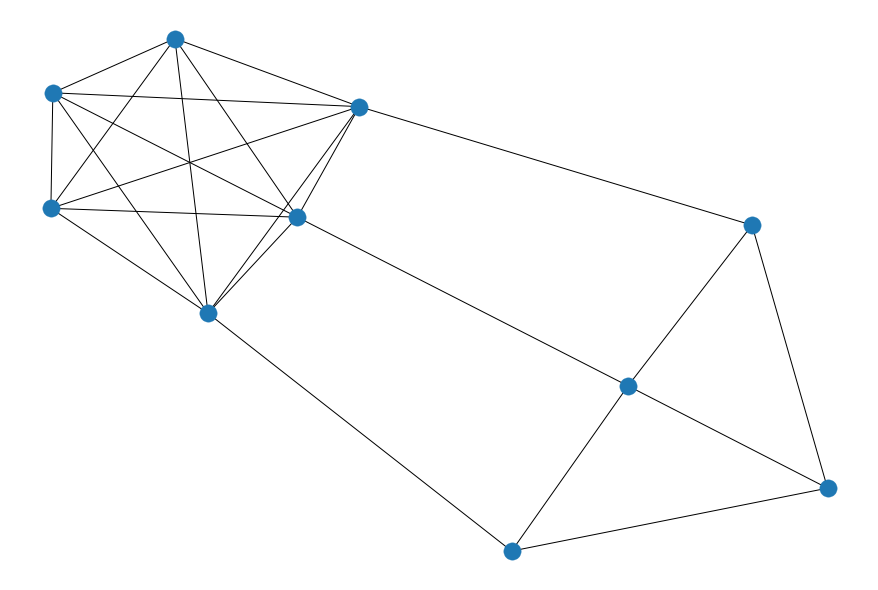

In [46]:
nx.draw_spring(g)

Выведем матрицу смежности, список смежности и список ребер этого графа

In [47]:
A = nx.adj_matrix(g)
A

<10x10 sparse matrix of type '<class 'numpy.longlong'>'
	with 46 stored elements in Compressed Sparse Row format>

In [48]:
A.todense()

matrix([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 1, 0, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 0, 1, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 0, 0, 0, 1, 0],
        [0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0]], dtype=int64)

In [49]:
nx.adjacency_data(g)

{'directed': False,
 'multigraph': False,
 'graph': [],
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 7},
  {'id': 9},
  {'id': 8}],
 'adjacency': [[{'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}],
  [{'id': 0}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 7}],
  [{'id': 0}, {'id': 1}, {'id': 3}, {'id': 4}, {'id': 5}, {'id': 6}],
  [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 4}, {'id': 5}],
  [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 5}],
  [{'id': 0}, {'id': 1}, {'id': 2}, {'id': 3}, {'id': 4}, {'id': 9}],
  [{'id': 2}, {'id': 7}, {'id': 8}],
  [{'id': 1}, {'id': 6}, {'id': 9}, {'id': 8}],
  [{'id': 5}, {'id': 7}, {'id': 8}],
  [{'id': 6}, {'id': 9}, {'id': 7}]]}

Сохраним что-нибудь из этого:

In [50]:
nx.write_edgelist(g, 'graph.edglist')
nx.write_graphml(g, 'graph.gml')

In [51]:
!head graph.gml # на Windows не сработает

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="undirected"><node id="0"/>
<node id="1"/>
<node id="2"/>
<node id="3"/>
<node id="4"/>
<node id="5"/>
<node id="6"/>
<node id="7"/>
<node id="9"/>


In [52]:
!head graph.edglist # на Windows не сработает

0 1 {}
0 2 {}
0 3 {}
0 4 {}
0 5 {}
1 2 {}
1 3 {}
1 4 {}
1 5 {}
1 7 {}


# (ваши) Соц-графы

* [Туториал](https://nbviewer.jupyter.org/github/allatambov/Py-programming-3/blob/master/15-06/lect-vk-api.ipynb) по выгрузке данных с помощью VKAPI

In [53]:
import json
import os

VKID = '1504653'

DATA_FOLDER = os.path.join('.', 'data')
VK_DATA_FOLDER = os.path.join(DATA_FOLDER, VKID)

In [54]:

filepath = os.path.join(VK_DATA_FOLDER, 'friends_{}.json'.format(VKID))

with open(filepath, 'r') as fin:
    friends_temp = json.load(fin)[0]

In [55]:
# Словарь с вашими друзьями
friends_temp

{'6477': {'id': 6477,
  'first_name': 'Oksana',
  'last_name': 'Ozernaya',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 1,
  'city': {'id': 1, 'title': 'Moscow'},
  'university': 714,
  'university_name': 'ОГИМ\r\n',
  'faculty': 144693,
  'faculty_name': 'Кафедра менеджмента',
  'graduation': 2010,
  'education_form': 'Full-time',
  'education_status': 'Student (Specialist)',
  'relation': 0,
  'online': 0,
  'track_code': '83bbb67dWye022TQ46g3XdYqN91OT8dM6d6dQUejpj10HVmWQXo2TLm9WYTkqzM_uqOoXes5'},
 '12831': {'id': 12831,
  'first_name': 'Igor',
  'last_name': 'Slinko',
  'is_closed': False,
  'can_access_closed': True,
  'sex': 2,
  'bdate': '16.5',
  'city': {'id': 1, 'title': 'Moscow'},
  'university': 297,
  'university_name': 'МФТИ (Физтех)',
  'faculty': 2080,
  'faculty_name': 'Факультет управления и прикладной математики',
  'graduation': 2012,
  'education_form': 'Full-time',
  'education_status': "Alumnus (Master's)",
  'relation': 0,
  'online': 0,
  'track_c

In [56]:
# Просто меняем строковый ключ на числовой
friends = dict()
for k in friends_temp.keys():
    friends[int(k)] = friends_temp[k]

In [57]:
filepath = os.path.join(VK_DATA_FOLDER, 'common_friends_{}.json'.format(VKID))

with open(filepath, 'r') as fin:
    common_friends_temp = json.load(fin)

In [58]:
# Словарь с общими друзьями между вами и вашими друзьями
common_friends_temp

{'6477': [16115,
  139259,
  1923197,
  19157021,
  20284659,
  25182311,
  34692281,
  68301181,
  153760902,
  197402485],
 '12831': [3989980,
  9868749,
  11164850,
  18184109,
  27213700,
  29076585,
  51654699,
  86711827],
 '46790': [341,
  29379,
  50475,
  50624,
  105977,
  122316,
  138824,
  139259,
  151466,
  197643,
  395405,
  447690,
  463668,
  500242,
  605838,
  909938,
  936157,
  1015259,
  1059226,
  1331785,
  1589592,
  1646095,
  2268115,
  2515478,
  3208444,
  3235590,
  3420621,
  3989980,
  4172549,
  4447169,
  105522823],
 '52286': [341,
  50475,
  463668,
  808258,
  1164018,
  1646095,
  1777201,
  2819238,
  3155411,
  4447169,
  9868749,
  16607104,
  18277227,
  23217813,
  34060724,
  42040640,
  90739126],
 '82899': [197643,
  395405,
  1571617,
  3208444,
  3600577,
  4224685,
  105522823,
  139600754,
  213876741],
 '86704': [50475,
  50624,
  94047,
  94220,
  234901,
  463668,
  480059,
  721773,
  808258,
  1164018,
  1194889,
  1523708,
  174

In [59]:
# Просто меняем строковый ключ на числовой
common_friends = dict()
for k in common_friends_temp.keys():
    common_friends[int(k)] = common_friends_temp[k]

In [60]:
g = nx.Graph()

In [61]:
# Делаем список из пар (vkid, словарь с характеристиками)

g.add_nodes_from((fid, {'sex': friend.get('sex', '-1'), 
                        'first_name': friend.get('first_name', '-1'), 
                        'last_name': friend.get('last_name', '-1'), 
                        'university_name': friend.get('university_name', '-1')}) for fid, friend in friends.items())

In [62]:
g.number_of_nodes()

328

In [63]:
# Делаем список из пар (vkid1, vkid2)
g.add_edges_from((f1, f2) for f1, f_list in common_friends.items() for f2 in f_list)

In [64]:
g.number_of_edges()

3016

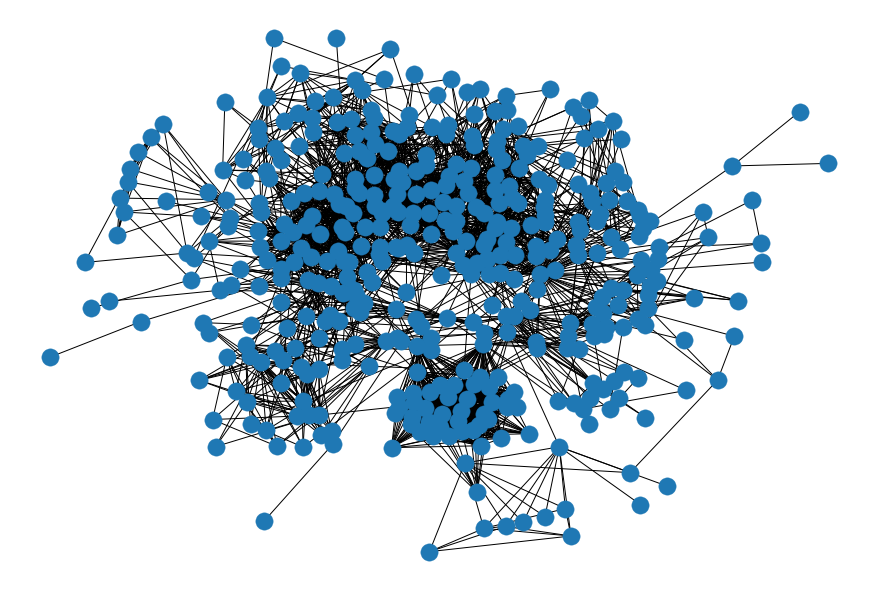

In [65]:
nx.draw_kamada_kawai(g)

In [66]:
nx.write_graphml(g, 'vk_graph.graphml')

Попробуем открыть это дело в gephi!

##  Поиск и вывод наиболее значимых вершин в вашей сети

In [67]:
btw = nx

In [68]:
btw

{6477: 0.008102801891757536,
 12831: 0.004889995552931725,
 46790: 0.004958442161188234,
 52286: 0.005989117384205097,
 82899: 0.00011038120279611027,
 86704: 0.0012216853736770922,
 94047: 0.0004553162560314314,
 105977: 0.00138159727613618,
 122316: 0.00020305975343291524,
 138824: 0.0011105583005195168,
 139259: 0.022664756870119478,
 151466: 0.00723294253735108,
 154079: 0.0,
 172552: 0.0,
 180827: 0.010361987256030289,
 197643: 0.004313120351459735,
 270802: 0.00220838747156007,
 350616: 0.0,
 361334: 0.0010428525331905008,
 395405: 0.0023350086152655915,
 409037: 0.02945204694962302,
 442470: 0.006370878870146475,
 447690: 0.00029348696766011586,
 463668: 0.0022074316248269087,
 480059: 0.0039331678590624275,
 492151: 0.0011853116129208051,
 500242: 0.002078193763275925,
 500358: 0.0,
 546565: 0.0026815129037512917,
 574103: 0.006080937588398835,
 605838: 0.022503552764776457,
 638154: 0.00016078644106706766,
 668534: 0.0017977220832326758,
 691410: 0.031654620172480136,
 729827:

## Выявление сообществ с помощью спектральной на матрице схожести
* Загрузим граф из `nested_partition.gml`. Это граф, построенный с помощью [генератора](https://sites.google.com/view/santofortunato/inthepress2) Benchmark сетей для тестов алгоритмов выявления сообществ.
* Визуализируем матрицу смежности графа с помощью метода `plt.spy(A)` (и саму сеть, если получится)
* Рассчитаем реализованные в `nexworkx` меры схожести вершин

По большому счету, полученные схожести можно подавать на вход любому алгоритму кластеризации, который изначально может работать со мерами близости (например аггломеративная кластеризация)

In [69]:
g = nx.read_gml('./data/nested_partition.gml', label='id')

In [70]:
g.number_of_nodes()

128

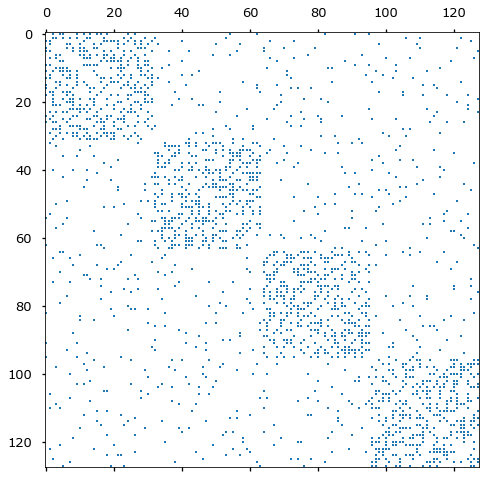

In [71]:
A = nx.adj_matrix(g)
plt.spy(A, markersize=2)

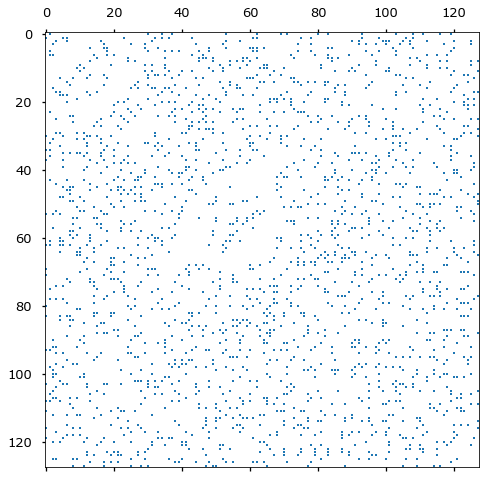

In [72]:
# Что бы мы увидили в реальной жизни
idx = np.random.permutation(range(128))
i = np.ix_(idx, idx)
plt.spy(A[i], markersize=2)

In [73]:
# Все положительные похожести по Жаккару
jac = nx.jaccard_coefficient(g)
jac = np.array(list(jac))

In [76]:
jac

array([[0.00000000e+00, 1.00000000e+00, 1.42857143e-01],
       [0.00000000e+00, 3.00000000e+00, 6.66666667e-02],
       [0.00000000e+00, 6.00000000e+00, 2.80000000e-01],
       ...,
       [1.23000000e+02, 1.27000000e+02, 6.66666667e-02],
       [1.24000000e+02, 1.26000000e+02, 6.66666667e-02],
       [1.24000000e+02, 1.27000000e+02, 1.42857143e-01]])

In [77]:
# Немного магии, чтобы получить из этого матрицу попарных СХОЖЕСТЕЙ по жаккару
from scipy.sparse import coo_matrix

# Переводим все в формат разреженной матрицы
D = coo_matrix((jac[:,2], (jac[:,0], jac[:,1])), shape=(128,128))

# Делаем ее симметричной
D = D+D.T

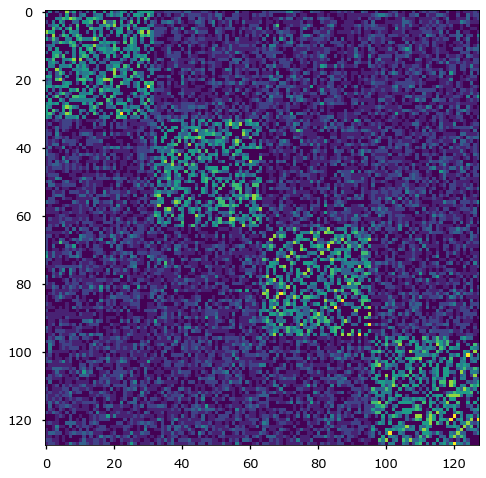

In [78]:
plt.imshow(D.toarray())

In [95]:
# Попробуем посчитать на этой близости спектральную кластеризацию
from sklearn.cluster import SpectralClustering, DBSCAN

In [108]:
model = DBSCAN(metric='precomputed', eps=0.05)
model.fit(D.toarray())


DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [109]:
labels = model.labels_

In [110]:
true_labeling = list(nx.get_node_attributes(g, 'label').values())

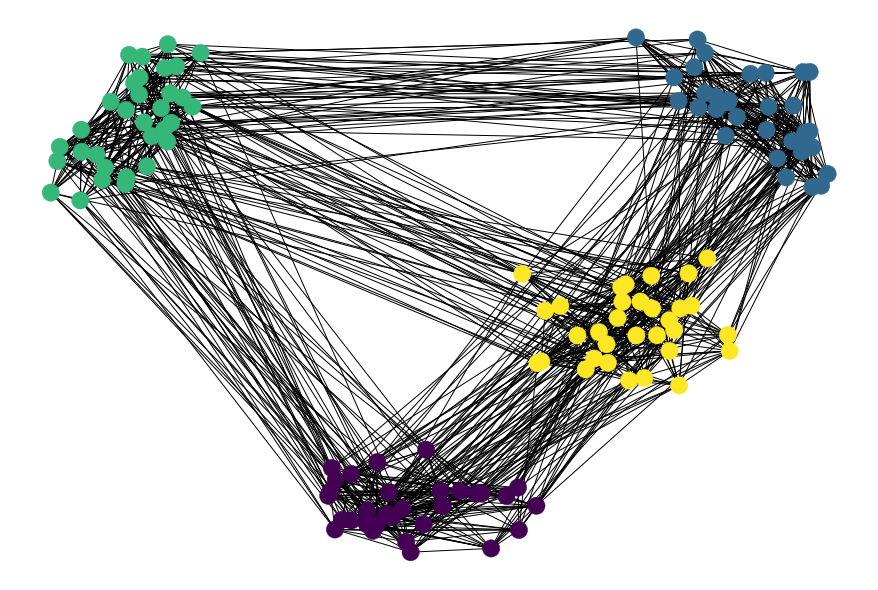

In [111]:
layout = nx.layout.spectral_layout(g)
nx.draw(g, pos=layout, node_color=true_labeling,)

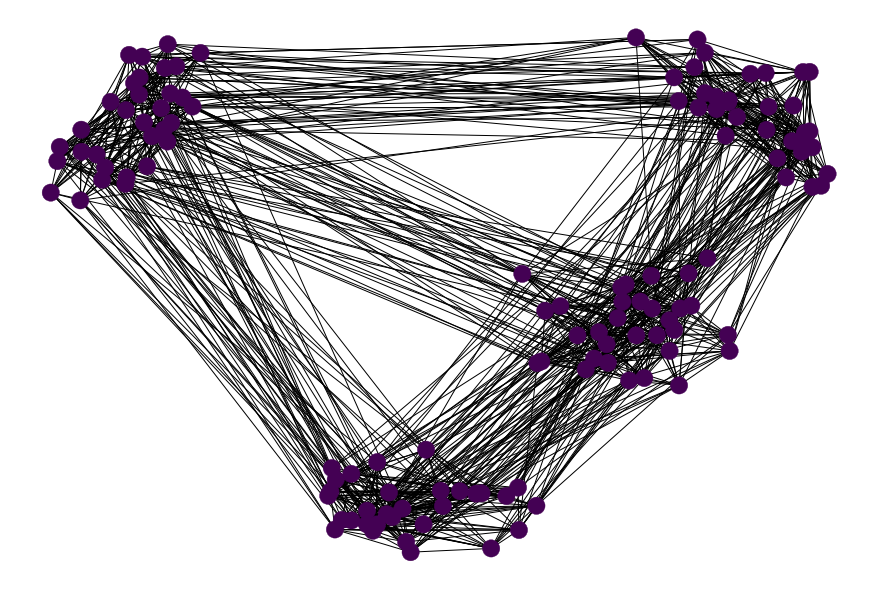

In [112]:
nx.draw(g, pos=layout, node_color=labels)

## Label propagation

Методы для выявления сообществ, которые реализованы в networkX можно найти [тут](https://networkx.github.io/documentation/stable/reference/algorithms/community.html#module-networkx.algorithms.community.community_utils)

In [128]:
lp_partition = nx.community.asyn_lpa_communities(g) # должен быть seed

In [129]:
lp_partition = list(lp_partition) # разбиение на сообщества 

In [130]:
len(lp_partition)

4

In [116]:
# Функция, которая из разбиения получает разметку для каждого объекта
def get_labeling_from_partition(partition):
    
    all_nodes = set()
    for cluster in partition:
        all_nodes |= cluster
    num_nodes = len(all_nodes)
    labeling = np.ones((num_nodes,), dtype=int)

    for label, ids in enumerate(partition):
        ids = list(ids)
        labeling[ids] = label
        
    return labeling

In [117]:
lp_labeling = get_labeling_from_partition(lp_partition)

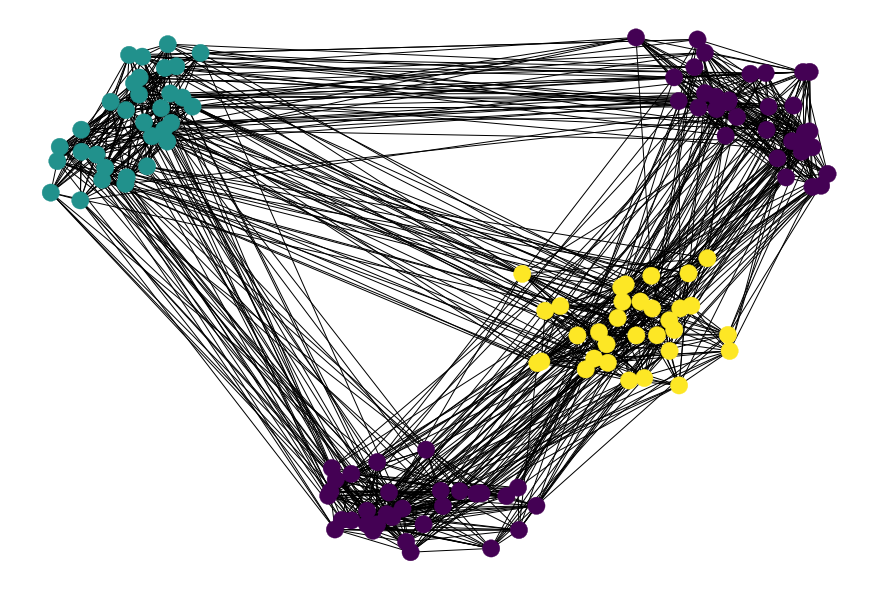

In [118]:
nx.draw(g, pos=layout, node_color=lp_labeling)

## Edge betweenness

In [131]:
eb_partitions = nx.community.girvan_newman(g)

In [132]:
k = 4 # Вернем разбиение на k сообщества
for partition in eb_partitions:
    if len(partition) == k:
        break

In [133]:
eb_partition = list(partition) # разбиение на сообщества 

In [134]:
eb_partition

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31},
 {32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63},
 {64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95},
 {96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127}]

In [135]:
eb_labeling = get_labeling_from_partition(eb_partition)

In [136]:
eb_labeling

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

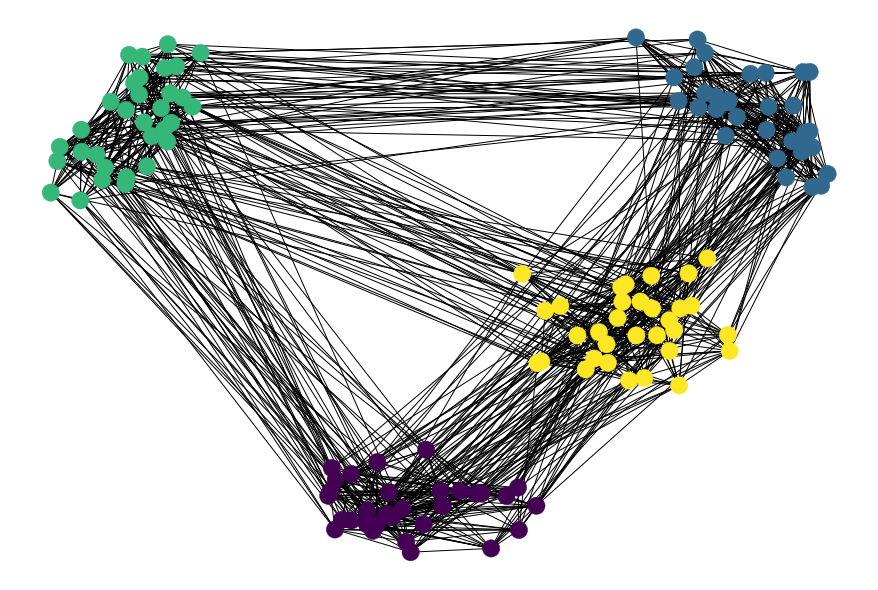

In [137]:
nx.draw(g, pos=layout, node_color=eb_labeling)

### Modularity

In [ ]:
# Просто функция, которая считает модулярность
from itertools import product
def modularity(G, communities, weight='weight'):
    multigraph = G.is_multigraph()
    directed = G.is_directed()
    m = G.size(weight=weight)
    if directed:
        out_degree = dict(G.out_degree(weight=weight))
        in_degree = dict(G.in_degree(weight=weight))
        norm = 1 / m
    else:
        out_degree = dict(G.degree(weight=weight))
        in_degree = out_degree
        norm = 1 / (2 * m)

    def val(u, v):
        try:
            if multigraph:
                w = sum(d.get(weight, 1) for k, d in G[u][v].items())
            else:
                w = G[u][v].get(weight, 1)
        except KeyError:
            w = 0
        # Double count self-loops if the graph is undirected.
        if u == v and not directed:
            w *= 2
        return w - in_degree[u] * out_degree[v] * norm

    Q = sum(val(u, v) for c in communities for u, v in product(c, repeat=2))
    return Q * norm

In [ ]:
eb_partitions = nx.community.girvan_newman(g)

In [ ]:
# Посчитаем модулярность для разбиений на 1,2,..10 сообществ
for partition in eb_partitions:
    num_com = len(partition)
    if num_com < 10:
        mod = modularity(g, partition)
        print('For {} communities modularity = {}'.format(num_com, mod))
    else:
        break

## Сообщества на графе друзей

Попробуйте найти сообщества на графе друзей

Перед этим, возможно, стоит "почистить граф"

# Пример расчета Асортативности

В файле `Princeton.gml` содержится граф дружбы студентов соответствующих, собранных в 2005 году из Facebook. Каждая вершина обладает следующими аттрибутами:
* Факультет
* Пол
* Основное направление подготовки
* Дополнительный направление подготовки (если есть)
* Общежитие проживания, домашнее проживание
* Год поступления
* Школа

Пропуски помечены значением `0`.

#### Задание
Посчитайте ассортативность для каждого из аттрибутов и ассортативность по степени узлов.

Сравните результаты между сетями и проинтерпретируйте их.

In [ ]:
!head ./data/Princeton.gml

In [ ]:
g = nx.read_gml('./data/Princeton.gml', label='id')

In [ ]:
attributes = g.node[0]

In [ ]:
attributes = g.node[0].keys()

In [ ]:
for attr in attributes:
    print('{} assortativity = {}'.format(attr, 
                                         nx.assortativity.attribute_assortativity_coefficient(g, attr)))

In [ ]:
# Матрица перемешивания e_ij
E = nx.assortativity.attribute_mixing_matrix(g, 'year')

In [ ]:
plt.imshow(E)

In [ ]:
nx.assortativity.degree_assortativity_coefficient(g)

# Сеть на основе вселенной Игры Престолов (spoiler alert!)

Рассмотрим две таблички: `characters.csv` и `events.csv`. Названия говорят сами за себя - в  `characters.csv` содержится информация о персонажах серии романов, а в `events.csv` описание событий. Мы будем рассматривать события, которыми славится Игры Престолов - убийства.

В первом файле, помимо индетификатора персонажа (`characterID`), нас будут интересовать поля имени (`Name`) и его группы (`Team`). <br/>
Во втором - события убийства  (`event = killed`) и поле с указанием убитого (`characterID`) и убийцы (`withID`)

#### Задание
* Постройте сеть (направленный граф nx.DiGraph) убийств персонажей. В каждой вершине должен быть сохранен атрибут имени и группы
* Оставим только персонажей из самых частых групп (для наглядности): `['Stark', 'Night Watch', 'Lannister', 'Robert', 'none', 'Wildlings (north of wall)', 'Greyjoy']`
* Переобозначте значения атрибута Team числами начиная с `0`
* Нарисуйте граф со стрелочками, раскрасив каждую вершину в цвет, в зависимости от их фрацкии
* Посчитайте коэффициент ассортативности по отношению к атрибуту "Team", который в данном контексте можно интерпретировать как "склонность убивать своих или чужих". Проинтерпретируйте полученный результат

In [ ]:
df_char = pd.read_csv('./data/characters.csv')
df_events = pd.read_csv('./data/events.csv')

In [ ]:
df_events.head()

In [ ]:
df_char.head()

In [ ]:
df_kill = df_events.query('event == "killed"').loc[:, ['characterID', 'withID']].dropna()
df_kill.loc[:, 'withID'] = df_kill.loc[:, 'withID'].astype(int)

In [ ]:
# Оставим только самые частые категории (для наглядности)
teams = ['Stark', 'Night Watch', 'Lannister', 'Robert', 'none', 'Wildlings (north of wall)', 'Greyjoy']

In [ ]:
idx = df_char.Team.isin(teams)
df_char = df_char.loc[idx, ['characterID', 'Name', 'Team']]

idx = df_kill.characterID.isin(df_char.characterID) & df_kill.withID.isin(df_char.characterID)
df_kill = df_kill.loc[idx, :]

In [ ]:
id_team_mapper = dict(zip(df_char.Team.unique(), range(df_char.Team.nunique())))

In [ ]:
idx = ( df_char.characterID.isin(df_kill.characterID) | df_char.characterID.isin(df_kill.withID) )
df_char_kill = df_char.loc[idx, :].reset_index(drop=True)
df_char_kill.loc[:, 'Team'] = df_char_kill.loc[:, 'Team'].replace(id_team_mapper)

In [ ]:
df_char_kill.head()

In [ ]:
id_mapper = dict(zip(df_char_kill.characterID.values, df_char_kill.index.values))

In [ ]:
df_kill.loc[:, 'characterID'] = df_kill.loc[:, 'characterID'].replace(id_mapper)
df_kill.loc[:, 'withID'] = df_kill.loc[:, 'withID'].replace(id_mapper)

In [ ]:
df_kill.head()

In [ ]:
# Теперь можно сделать граф и посчитать ассортативность с атрибутом Team